In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
plt.ion()

## Creating artificial dataset

In [20]:
num_samples = 100

# Creating output ground truth, and adding gaussian noise to it
Y = np.linspace(0, 10, num_samples) + np.random.normal(loc=0, scale=1.0, size=(num_samples))

X = np.array([
    np.linspace(0, 10, num_samples),    # Feature one
    np.linspace(10, -10, num_samples), # Feature two
    np.linspace(100, -100, num_samples),      # Feature three
    np.linspace(0, 1000, num_samples)     # Feature four
]).T                                    # Taking transpose to keep the features in columns

# Adding artificial gaussian noise to the features
X += np.random.normal(loc=0, scale=1.0, size=(X.shape))

## Plotting dataset

<IPython.core.display.Javascript object>


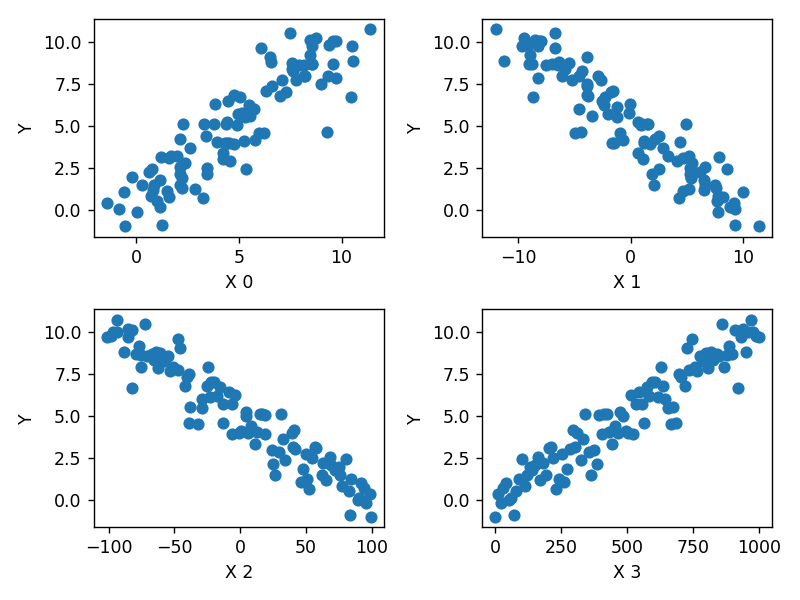

In [21]:
# Plotting all features with the output y
fig, axs = plt.subplots(int(X.shape[1]/2), 2)

for j in range(int(X.shape[1]/2)):
    for i in range(2):
        axs[j, i].scatter(X[:, int(j * (X.shape[1]/2) + i)], Y)
        axs[j, i].set_ylabel("Y")
        axs[j, i].set_xlabel("X " + str(int(j * (X.shape[1]/2) + i)))
        
fig.tight_layout()
plt.show()

# Fitting a linear model on the data

The linear equation Y = b + m1*x1 + m2*x2 + m3*x3 ... mn*xn will be fitted on the dataset
Where b is the intercept, m is the slope, x is the feature column and Y is the model prediction

<IPython.core.display.Javascript object>


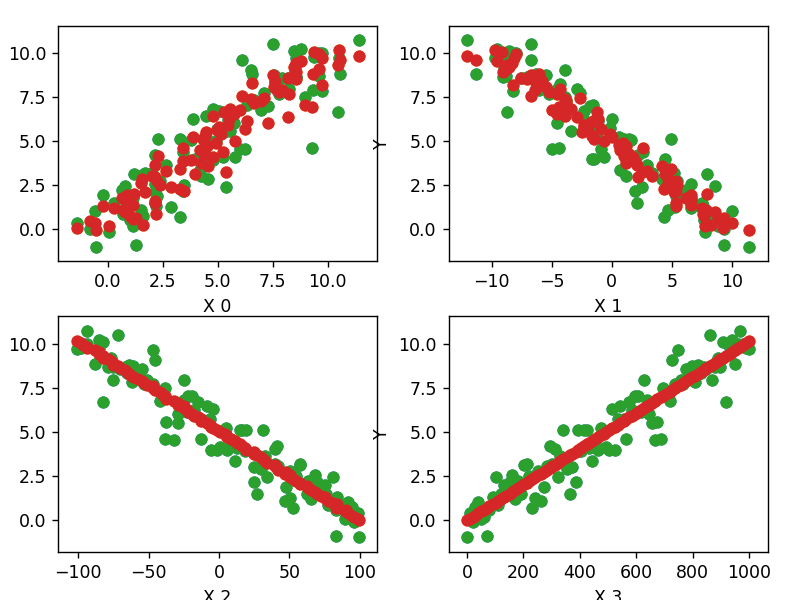

Final params:
[ 1.49180074e-05  9.69249998e-05 -5.46467382e-05 -5.27931499e-04
  1.01104607e-02]


In [25]:
learning_rate = 0.000001
iterations = 10

ms = np.zeros(X.shape[1]+1, dtype=np.float)
# ms[0] is intercept b

fig, axs = plt.subplots(int(X.shape[1]/2), 2)
fig.tight_layout()
for i in range(iterations):
    # Finding the prediction vector
    predictions = ms[0]
    for x in range(X.shape[1]):
        predictions += ms[x+1] * X[:, x]
        
    # Plotting starts here
    # Plotting all features with the output y
    for j in range(int(X.shape[1]/2)):
        for i in range(2):
            axs[j, i].clear()
            axs[j, i].scatter(X[:, int(j * (X.shape[1]/2) + i)], Y)
            axs[j, i].scatter(X[:, int(j * (X.shape[1]/2) + i)], predictions)
            axs[j, i].set_ylabel("Y")
            axs[j, i].set_xlabel("X " + str(int(j * (X.shape[1]/2) + i)))

    fig.canvas.draw()
    plt.pause(0.1)
    # Plotting ends here
        
    # Computing the gradients
    diffs = Y - predictions
    Dm = -2/num_samples * np.sum(X * diffs[:, np.newaxis], axis=0)
    Db = -2/num_samples * np.sum(diffs)
    
    # Updating params
    ms[1:] -= learning_rate * Dm    # Updating slopes
    ms[0] -= learning_rate * Db     # Updating intercept

# Finding the prediction vector from the trained model
predictions = ms[0]
for x in range(X.shape[1]):
    predictions += ms[x+1] * X[:, x]

# Plotting results
# Plotting all features with the output y
for j in range(int(X.shape[1]/2)):
    for i in range(2):
        axs[j, i].scatter(X[:, int(j * (X.shape[1]/2) + i)], Y)
        axs[j, i].scatter(X[:, int(j * (X.shape[1]/2) + i)], predictions)
        axs[j, i].set_ylabel("Y")
        axs[j, i].set_xlabel("X " + str(int(j * (X.shape[1]/2) + i)))
        
plt.show()

print("Final params:")
print(ms)